In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

Train DataSet

In [4]:
Flight_DF = pd.read_csv('Data_Train.csv')
Flight_DF.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
Flight_DF.shape

(10683, 11)

Loading Test Dataset

In [7]:
Flight_test_DF = pd.read_csv('Test_set.csv')
Flight_test_DF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


Checking for null values

In [8]:
Flight_DF.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 null values, One in "Route" and one in "Total_Stops" columns of Train Dataset

In [9]:
Flight_test_DF.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values in Test DataSet.

# Checking for blank spaces, special charectors in each column

In [10]:
search = [" ","?","-",","," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
col = ['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']
for c in col:
    for s in search:
        print(f"{s} in {c} = ",end=" ")
        print((Flight_DF[c]==s).sum())

  in Airline =  0
? in Airline =  0
- in Airline =  0
, in Airline =  0
 ? in Airline =  0
 - in Airline =  0
?  in Airline =  0
-  in Airline =  0
 ?  in Airline =  0
 -  in Airline =  0
NA in Airline =  0
N/A in Airline =  0
 NA in Airline =  0
 N/A in Airline =  0
  in Date_of_Journey =  0
? in Date_of_Journey =  0
- in Date_of_Journey =  0
, in Date_of_Journey =  0
 ? in Date_of_Journey =  0
 - in Date_of_Journey =  0
?  in Date_of_Journey =  0
-  in Date_of_Journey =  0
 ?  in Date_of_Journey =  0
 -  in Date_of_Journey =  0
NA in Date_of_Journey =  0
N/A in Date_of_Journey =  0
 NA in Date_of_Journey =  0
 N/A in Date_of_Journey =  0
  in Source =  0
? in Source =  0
- in Source =  0
, in Source =  0
 ? in Source =  0
 - in Source =  0
?  in Source =  0
-  in Source =  0
 ?  in Source =  0
 -  in Source =  0
NA in Source =  0
N/A in Source =  0
 NA in Source =  0
 N/A in Source =  0
  in Destination =  0
? in Destination =  0
- in Destination =  0
, in Destination =  0
 ? in Dest

There are no blank space and special charectors in columns of train dataset.

It is observed that Route amd Total_Stops columns in Train Dataset have only 2 null values in total, so dropping those rows.

In [11]:
Flight_DF.dropna(inplace = True)

In [12]:
Flight_DF.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now in Train Dataset no more null values.

In [13]:
Flight_DF.shape

(10682, 11)

In [14]:
Flight_DF.reset_index(inplace = True,drop = True)

# DataFrame Descroption:


Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records/

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket


# Getting the basic summary and statistical information of the data


In [16]:
Flight_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


All feature columns are object type however Date_of_Journey has date type data, Duration, Dep_Time,Arrival_Time have Time Data.

In [17]:
Flight_DF.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Interpreting relationship between Independent and Dependent variables

Analysing Target column

<AxesSubplot:xlabel='Price', ylabel='Density'>

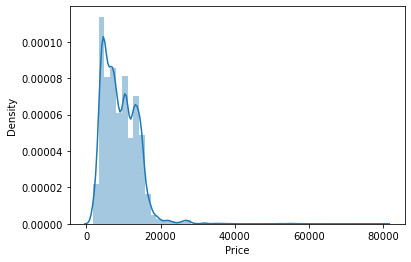

In [18]:
sns.distplot(Flight_DF.Price)

Distribution is skewed and tails of from 20000 mark.

In [19]:
Flight_DF.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [20]:
Flight_DF.Price.skew()

1.812404554693161

From the graph above it is observed that the price data forms a continuous with mean of 9087.214 and tails off from 20000 mark.

# Analysing the Feature Columns

In [21]:
#Checking the categorical columns

Flight_DF.dtypes[Flight_DF.dtypes == 'object'] 

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [22]:
Flight_DF['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

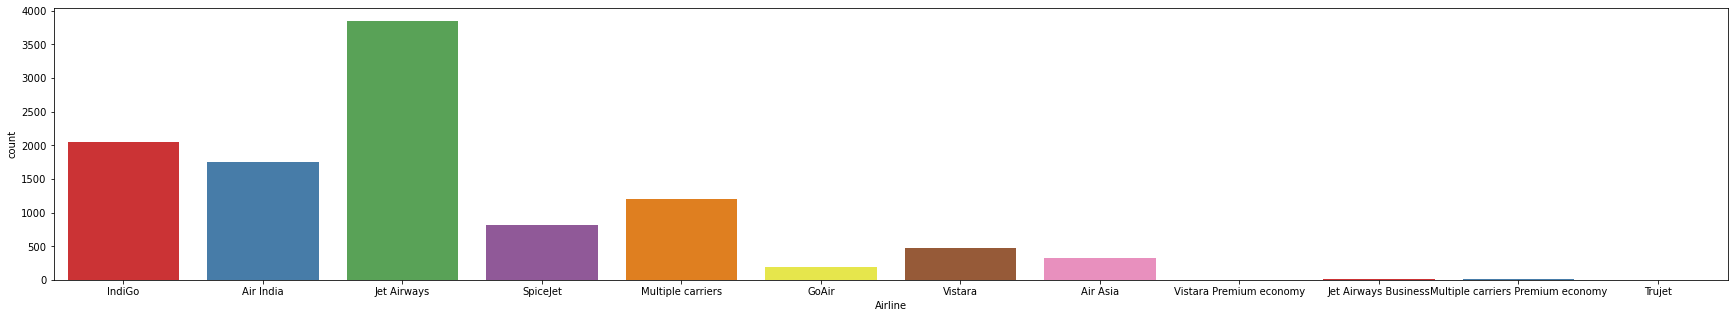

In [24]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(Flight_DF['Airline'],palette="Set1")

Jet Airways has the highest number of flights followed by indigo

In [25]:
Flight_DF['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [26]:
Flight_DF['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [27]:
Flight_DF['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

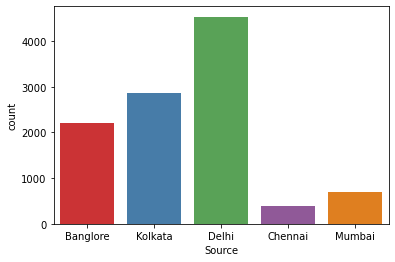

In [28]:
sns.countplot(Flight_DF['Source'],palette="Set1")

Highest number of flights are from Delhi followed by Kolkata, Benglore

<AxesSubplot:xlabel='Destination', ylabel='count'>

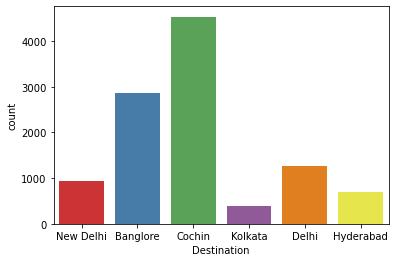

In [29]:
sns.countplot(Flight_DF['Destination'],palette="Set1")

Cochin is the most popular destination followed by Banglore

In [30]:
Flight_DF['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

"Total_Stops" have 5 unique categories

In [32]:
Flight_DF['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

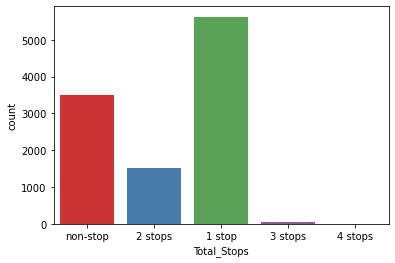

In [33]:
sns.countplot(Flight_DF['Total_Stops'],palette="Set1")

Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop.

In [34]:
Flight_DF['Route'].unique()

array(['BLR ? DEL', 'CCU ? IXR ? BBI ? BLR', 'DEL ? LKO ? BOM ? COK',
       'CCU ? NAG ? BLR', 'BLR ? NAG ? DEL', 'CCU ? BLR',
       'BLR ? BOM ? DEL', 'DEL ? BOM ? COK', 'DEL ? BLR ? COK',
       'MAA ? CCU', 'CCU ? BOM ? BLR', 'DEL ? AMD ? BOM ? COK',
       'DEL ? PNQ ? COK', 'DEL ? CCU ? BOM ? COK', 'BLR ? COK ? DEL',
       'DEL ? IDR ? BOM ? COK', 'DEL ? LKO ? COK',
       'CCU ? GAU ? DEL ? BLR', 'DEL ? NAG ? BOM ? COK',
       'CCU ? MAA ? BLR', 'DEL ? HYD ? COK', 'CCU ? HYD ? BLR',
       'DEL ? COK', 'CCU ? DEL ? BLR', 'BLR ? BOM ? AMD ? DEL',
       'BOM ? DEL ? HYD', 'DEL ? MAA ? COK', 'BOM ? HYD',
       'DEL ? BHO ? BOM ? COK', 'DEL ? JAI ? BOM ? COK',
       'DEL ? ATQ ? BOM ? COK', 'DEL ? JDH ? BOM ? COK',
       'CCU ? BBI ? BOM ? BLR', 'BLR ? MAA ? DEL',
       'DEL ? GOI ? BOM ? COK', 'DEL ? BDQ ? BOM ? COK',
       'CCU ? JAI ? BOM ? BLR', 'CCU ? BBI ? BLR', 'BLR ? HYD ? DEL',
       'DEL ? TRV ? COK', 'CCU ? IXR ? DEL ? BLR',
       'DEL ? IXU ? BOM ? COK', 'CCU 

We can see that Route values encompass respective Source,Destination and Stopages in between.

In [35]:
Flight_DF['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [36]:
Flight_DF['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
04:15      1
12:45      1
16:25      1
04:50      1
21:40      1
Name: Dep_Time, Length: 222, dtype: int64

In [37]:
Flight_DF['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [38]:
Flight_DF['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
01:30 07 Apr      1
04:25 03 May      1
00:50 10 Apr      1
02:20 10 Jun      1
02:45 13 May      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [39]:
Flight_DF['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

In [41]:
Flight_DF.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [42]:
Flight_DF.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# % of data that is 'No info/ No Info'

In [43]:
((Flight_DF['Additional_Info'] == 'No info').sum() +  (Flight_DF['Additional_Info'] == 'No Info').sum())/Flight_DF.Additional_Info.count()*100

78.14079760344505

78% of the data is unusable since there is no information available regarding it. Therefore 'Additional_Info' column must be dropped.

# Interpreting Relationship between Independent and Dependent Variables

Grouping the data date-wise to better understand the relationship between 'Date_of_Journey' and 'Price'

Text(0.5, 1.0, 'Price Trend')

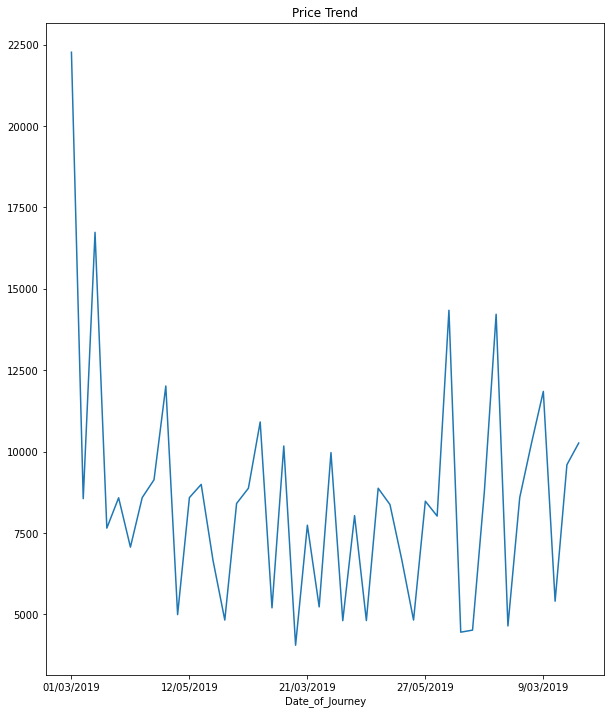

In [44]:
plt.figure(figsize=(10,12))
Flight_DF.groupby('Date_of_Journey').median()['Price'].plot()
plt.title('Price Trend')

From the above graph it observed that there is a steady decline in Flight Price from March to May.

# Creating 'Day' and 'Month' columns from 'Date' column

In [46]:
Flight_DF['Date_of_Journey'] = pd.to_datetime(Flight_DF['Date_of_Journey']) #creating datetime type dataframe

In [47]:
Flight_DF['Day'] = Flight_DF['Date_of_Journey'].apply(lambda d:d.day) #mapping days values to 'Day' column in main dataframe

In [48]:
Flight_DF['Month'] = Flight_DF['Date_of_Journey'].apply(lambda m:m.month) #maping month values to 'Month' column in main dataframe

In [49]:
Flight_DF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10678,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10680,Vistara,2019-01-03,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


Dropping "Additional_Info" and "Date_of_Journey" columns since both are not contributing to build a good model for predicting the target variable values.

In [51]:
Flight_DF.drop(columns = ['Date_of_Journey','Additional_Info'],inplace = True)

In [52]:
Flight_DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,4107,4,9
10678,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,4145,27,4
10679,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,7229,27,4
10680,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,12648,3,1


# Analysing Relationship between Day, Month and Price

In [54]:
Flight_DF.Month

0         3
1         1
2         9
3        12
4         1
         ..
10677     9
10678     4
10679     4
10680     1
10681     9
Name: Month, Length: 10682, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='Price'>

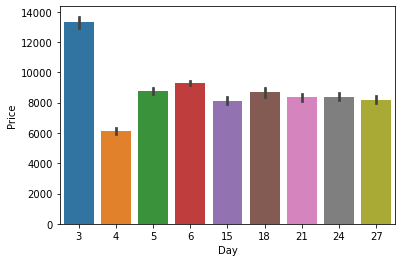

In [55]:
sns.barplot(x='Day',y='Price',data = Flight_DF)

From above graph it can be observed that Flight Prices are the highest on 3rd day of a month and lowest on the 4th day.

<AxesSubplot:xlabel='Month', ylabel='Price'>

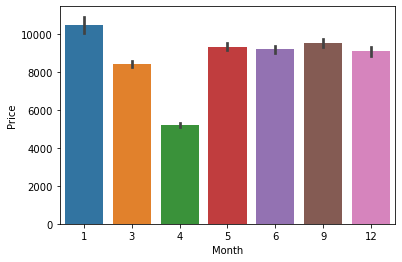

In [56]:
sns.barplot(x='Month',y='Price',data = Flight_DF)

From above graph it can be observed that Flight Prices are the highest in January and lowest in April.

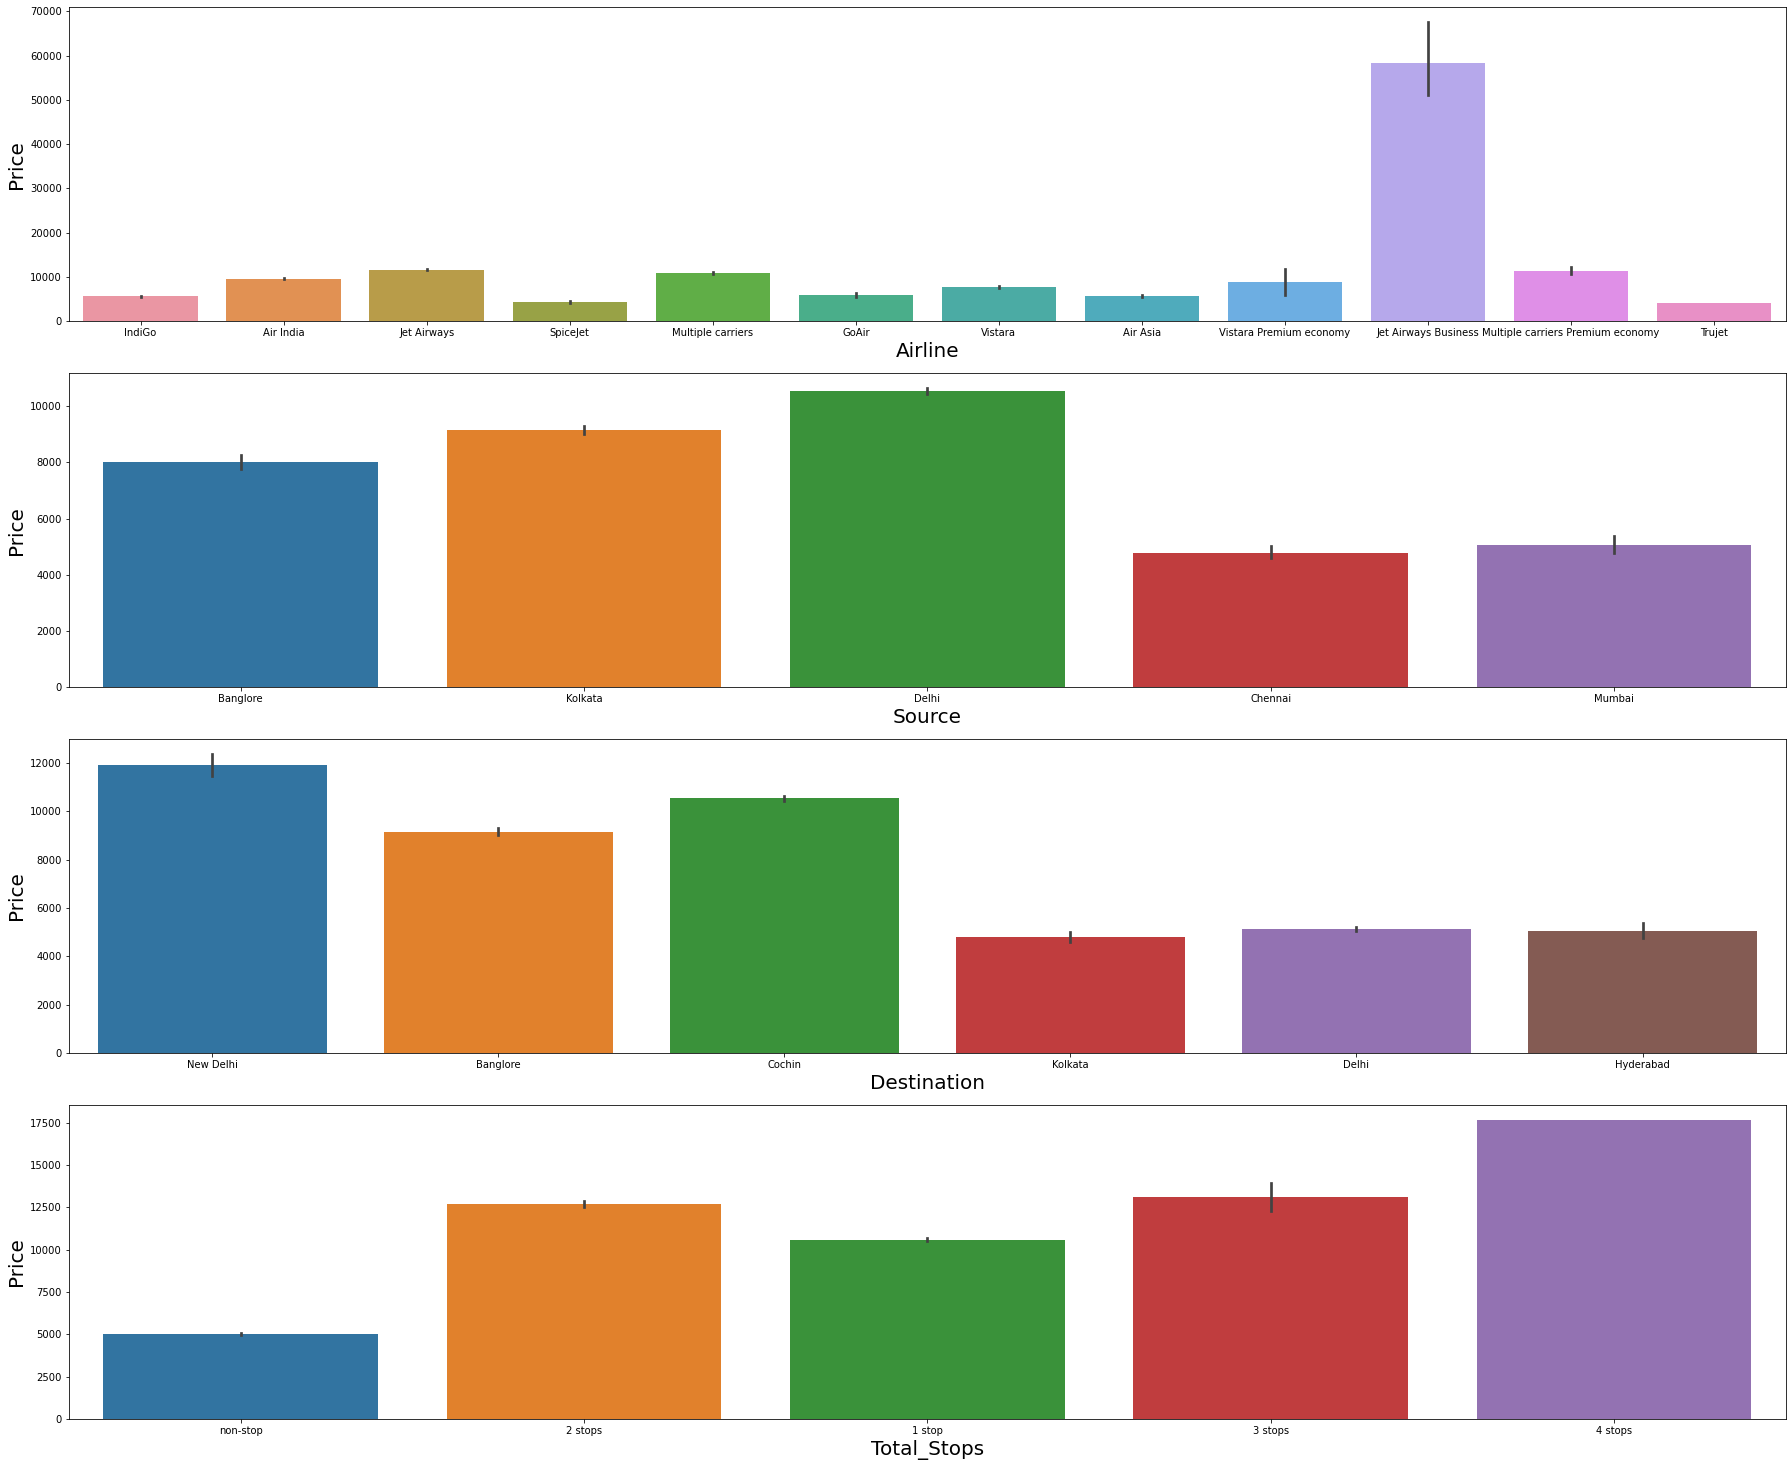

In [57]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
y = Flight_DF['Price']
X =  Flight_DF.drop(columns=['Price','Month','Day','Route','Dep_Time','Arrival_Time','Duration'])
for col in X:
    if plotnum<=5:
        plt.subplot(5,1,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnum+=1
plt.tight_layout()

From above Graphs, following observations can be made:

Jet Airways Business is by far the most expensive.

Flight prices are the highest when source is Delhi, followed by Kolkata.

Flight prices are the highest when Destination is Cochin, followed by New Delhi and Bangalore.

The higher the number of stops the higher is the fare.

# Duration column vs Price

In [59]:
Flight_DF['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10677    2h 30m
10678    2h 35m
10679        3h
10680    2h 40m
10681    8h 20m
Name: Duration, Length: 10682, dtype: object

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [60]:
duration = Flight_DF['Duration'].tolist()  #creating a list with values from column 'Duration'

In [61]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [62]:
#replacing 'h' with *60, whitespace with "+" and removing "m"

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace(" ","+").replace("m","") 

In [63]:
duration

['2*60+50',
 '7*60+25',
 '19*60',
 '5*60+25',
 '4*60+45',
 '2*60+25',
 '15*60+30',
 '21*60+5',
 '25*60+30',
 '7*60+50',
 '13*60+15',
 '2*60+35',
 '2*60+15',
 '12*60+10',
 '2*60+35',
 '26*60+35',
 '4*60+30',
 '22*60+35',
 '23*60',
 '20*60+35',
 '5*60+10',
 '15*60+20',
 '2*60+50',
 '2*60+55',
 '13*60+20',
 '15*60+10',
 '5*60+45',
 '5*60+55',
 '2*60+50',
 '2*60+15',
 '2*60+15',
 '13*60+25',
 '2*60+50',
 '22*60',
 '5*60+30',
 '10*60+25',
 '5*60+15',
 '2*60+30',
 '6*60+15',
 '11*60+55',
 '11*60+5',
 '8*60+30',
 '22*60+5',
 '2*60+45',
 '12*60',
 '2*60+50',
 '2*60+50',
 '2*60+15',
 '16*60+5',
 '19*60+55',
 '3*60+15',
 '25*60+20',
 '2*60+50',
 '3*60',
 '2*60+50',
 '16*60+15',
 '15*60+5',
 '2*60+15',
 '6*60+30',
 '25*60+5',
 '12*60+25',
 '27*60+20',
 '10*60+15',
 '10*60+30',
 '2*60+15',
 '10*60+25',
 '2*60+50',
 '1*60+30',
 '13*60+20',
 '2*60+15',
 '1*60+25',
 '26*60+30',
 '7*60+20',
 '13*60+30',
 '5*60',
 '2*60+45',
 '2*60+50',
 '1*60+30',
 '19*60+5',
 '2*60+15',
 '14*60+50',
 '2*60+40',
 '22*

In [64]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [65]:
duration

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [66]:
len(duration)

10682

Adding Duration(mins) column to Flight_DF dataframe.

In [67]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [68]:
dur_df.index = Flight_DF.index

In [69]:
Flight_DF['Duration(mins)'] = dur_df['Duration(mins)']

In [70]:
Flight_DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,12648,3,1,160


Dropping the original Duration Column

In [71]:
Flight_DF.drop(columns=['Duration'],inplace=True)

In [72]:
Flight_DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,non-stop,12648,3,1,160


Text(0.5, 1.0, 'Price Trend')

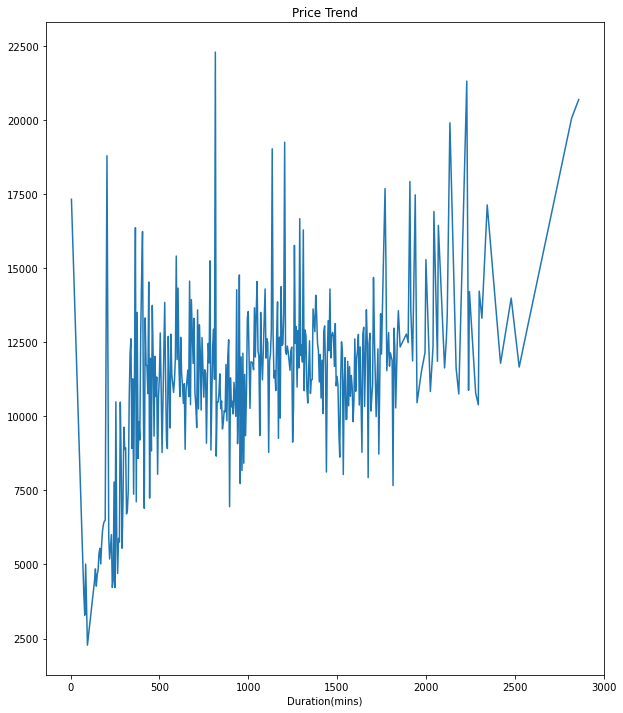

In [73]:
plt.figure(figsize=(10,12))
Flight_DF.groupby('Duration(mins)').mean()['Price'].plot()
plt.title('Price Trend')

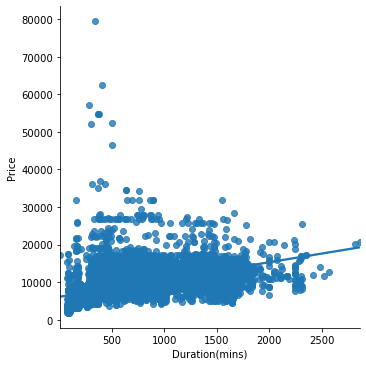

In [74]:
sns.lmplot(x="Duration(mins)",y="Price",data=Flight_DF)

There is a linear relationship between Price and Flight duration

In [75]:
Flight_DF

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,non-stop,12648,3,1,160


Dropping column : 'Route' since 'Total_Stops' in combination with 'Source' and 'Destination' columns conveys the same information.



Dropping columns : Dep_Time, Arrival_Time since 'Duration(mins)' conveys the difference between Dep_Time and Arrival_Time.

In [76]:
Flight_DF.drop(columns = ['Route','Dep_Time','Arrival_Time'],inplace=True)
Flight_DF

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,150
10678,Air India,Kolkata,Banglore,non-stop,4145,27,4,155
10679,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,180
10680,Vistara,Banglore,New Delhi,non-stop,12648,3,1,160


# Checking for outliers in continuous data type features

<AxesSubplot:xlabel='Duration(mins)'>

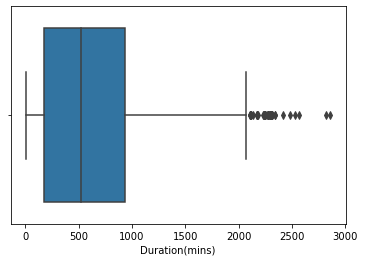

In [77]:
sns.boxplot(Flight_DF['Duration(mins)'])

There are outliers in all of the above column

# Removing outliers using Zscore Method

In [78]:
# making a copy of the continuous data type column

df2 = Flight_DF[['Duration(mins)']].copy()

In [80]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs <3).all(axis=1)] #taking 3 as threshold value

In [81]:
df3.shape

(10616, 1)

In [82]:
df2.shape

(10682, 1)

# Checking Data loss %

In [83]:
loss = (10682-10616)/10682*100

In [84]:
loss

0.6178618236285339

0.61% od data loss is within acceptable range

# Using IQR method

In [85]:
df =Flight_DF[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [86]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
    
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [87]:
df = df.drop(indxdrop)

In [88]:
df.shape

(10609, 1)

# checking data loss %

In [90]:
loss = (10682-10609)/10682*100
loss

0.6833926231042875

# Using Z Score method to reduce outliers since it has a lower data loss %

In [91]:
dropindx = Flight_DF.index.difference(df3.index)

In [92]:
dropindx

Int64Index([  226,   553,   966,   969,  1067,  1113,  1346,  1442,  1496,
             1551,  1657,  1791,  1804,  2172,  2553,  2641,  2654,  2718,
             3457,  3790,  3815,  3966,  4047,  4118,  4463,  4655,  5516,
             5701,  5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,
             6884,  7189,  7232,  7306,  7329,  7553,  7611,  7612,  7876,
             7906,  8127,  8153,  8360,  8409,  8412,  8601,  8621,  8698,
             8729,  9246,  9395,  9483,  9550,  9672,  9702,  9847, 10019,
            10325, 10455, 10638],
           dtype='int64')

In [93]:
Flight_DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [94]:
Flight_DF.reset_index(drop = True,inplace=True) #resetting the index of the dataframe

In [95]:
Flight_DF

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...
10611,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,150
10612,Air India,Kolkata,Banglore,non-stop,4145,27,4,155
10613,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,180
10614,Vistara,Banglore,New Delhi,non-stop,12648,3,1,160


<AxesSubplot:xlabel='Duration(mins)'>

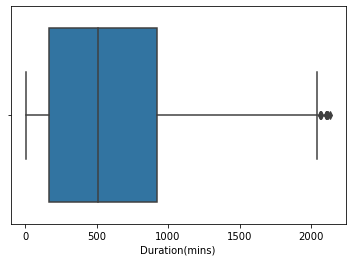

In [96]:
sns.boxplot(Flight_DF['Duration(mins)'])

Maximum outliers have been removed.

# Checking for skewness in data distributions

In [97]:
Flight_DF['Duration(mins)'].skew()

0.7745762809858823

# Normalizing data distributions using Power Transformer

In [98]:
from sklearn.preprocessing import PowerTransformer

In [99]:
powtrns = PowerTransformer(method = 'yeo-johnson',standardize = True)

In [100]:
df4 = Flight_DF[['Duration(mins)']]

In [102]:
transformed = powtrns.fit_transform(df4)

In [103]:
type(transformed)

numpy.ndarray

In [104]:
transformed = pd.DataFrame(transformed, columns = df4.columns) #to convert numpy array back into dataframe

In [105]:
transformed.skew()

Duration(mins)   -0.049276
dtype: float64

In [106]:
transformed.index = Flight_DF.index

In [107]:
Flight_DF[['Duration(mins)']] = transformed[['Duration(mins)']]

In [108]:
Flight_DF['Duration(mins)'].skew()

-0.04927558880390725

A lot of skewness has been removed

# Encoding categorical columns

Encoding using get_dummies()

In [109]:
Flight_DF

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,-1.058987
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,-0.050628
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1.066294
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,-0.394137
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,-0.533541
...,...,...,...,...,...,...,...,...
10611,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,-1.180901
10612,Air India,Kolkata,Banglore,non-stop,4145,27,4,-1.149160
10613,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,-1.002626
10614,Vistara,Banglore,New Delhi,non-stop,12648,3,1,-1.118294


In [110]:
dumm = pd.get_dummies(Flight_DF[['Airline','Source','Destination','Total_Stops']],drop_first = False)

In [111]:
dumm

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10612,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10613,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
10614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [113]:
Flight_DF = Flight_DF.join(dumm)

In [114]:
Flight_DF.drop(columns=['Airline','Source','Destination','Total_Stops'],inplace=True)

In [115]:
Flight_DF

,Price,Day,Month,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,3,-1.058987,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7662,5,1,-0.050628,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,13882,6,9,1.066294,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,6218,5,12,-0.394137,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13302,3,1,-0.533541,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,4107,4,9,-1.180901,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10612,4145,27,4,-1.149160,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10613,7229,27,4,-1.002626,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
10614,12648,3,1,-1.118294,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Findingn Correlation

In [116]:
f_corr = Flight_DF.corr()

In [117]:
f_corr

,Price,Day,Month,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
Price,1.000000,-0.163800,0.012569,0.597807,-0.132746,0.046805,-0.094883,-0.360424,0.417703,0.254293,...,0.269770,-0.313008,-0.231394,-0.179013,0.189667,0.351768,0.316820,0.059517,0.018149,-0.613766
Day,-0.163800,1.000000,-0.264537,-0.042612,0.009073,-0.035450,0.002286,0.013023,-0.029883,-0.026191,...,0.112955,0.011342,-0.012768,0.012148,-0.097926,-0.046861,0.016578,-0.023443,-0.010690,0.040563
Month,0.012569,-0.264537,1.000000,0.072402,0.000413,-0.000517,-0.017752,-0.037931,0.059543,-0.026823,...,0.008446,0.008451,-0.016971,-0.015271,-0.099360,0.028432,0.043202,0.015963,-0.014736,-0.063499
Duration(mins),0.597807,-0.042612,0.072402,1.000000,-0.098619,0.192739,-0.078992,-0.359689,0.325384,-0.005490,...,0.400066,-0.386143,-0.377941,-0.241239,0.017669,0.498271,0.416660,0.059425,0.015893,-0.842692
Airline_Air Asia,-0.132746,0.009073,0.000413,-0.098619,1.000000,-0.076991,-0.024014,-0.086183,-0.132204,-0.004186,...,-0.060989,0.056181,-0.046586,-0.033959,-0.019262,-0.044248,-0.056091,-0.009678,-0.001708,0.089376
Airline_Air India,0.046805,-0.035450,-0.000517,0.192739,-0.076991,1.000000,-0.059679,-0.214181,-0.328551,-0.010402,...,-0.005380,-0.065859,0.023211,-0.049915,0.052816,-0.186801,0.362335,0.088265,0.022189,-0.078462
Airline_GoAir,-0.094883,0.002286,-0.017752,-0.078992,-0.024014,-0.059679,1.000000,-0.066805,-0.102478,-0.003244,...,-0.008331,0.099601,-0.036111,-0.026324,0.017587,-0.001117,-0.054633,-0.007502,-0.001324,0.042222
Airline_IndiGo,-0.360424,0.013023,-0.037931,-0.359689,-0.086183,-0.214181,-0.066805,1.000000,-0.367778,-0.011644,...,-0.077840,0.089346,0.059393,0.141449,-0.018815,-0.140874,-0.182938,-0.026924,-0.004752,0.287286
Airline_Jet Airways,0.417703,-0.029883,0.059543,0.325384,-0.132204,-0.328551,-0.102478,-0.367778,1.000000,-0.017862,...,-0.019659,-0.052231,-0.025120,-0.144918,0.058124,0.198937,0.080649,-0.041300,-0.007290,-0.265623
Airline_Jet Airways Business,0.254293,-0.026191,-0.026823,-0.005490,-0.004186,-0.010402,-0.003244,-0.011644,-0.017862,1.000000,...,-0.004265,-0.008746,-0.006294,-0.004588,0.048802,0.006518,0.013447,-0.001308,-0.000231,-0.016646


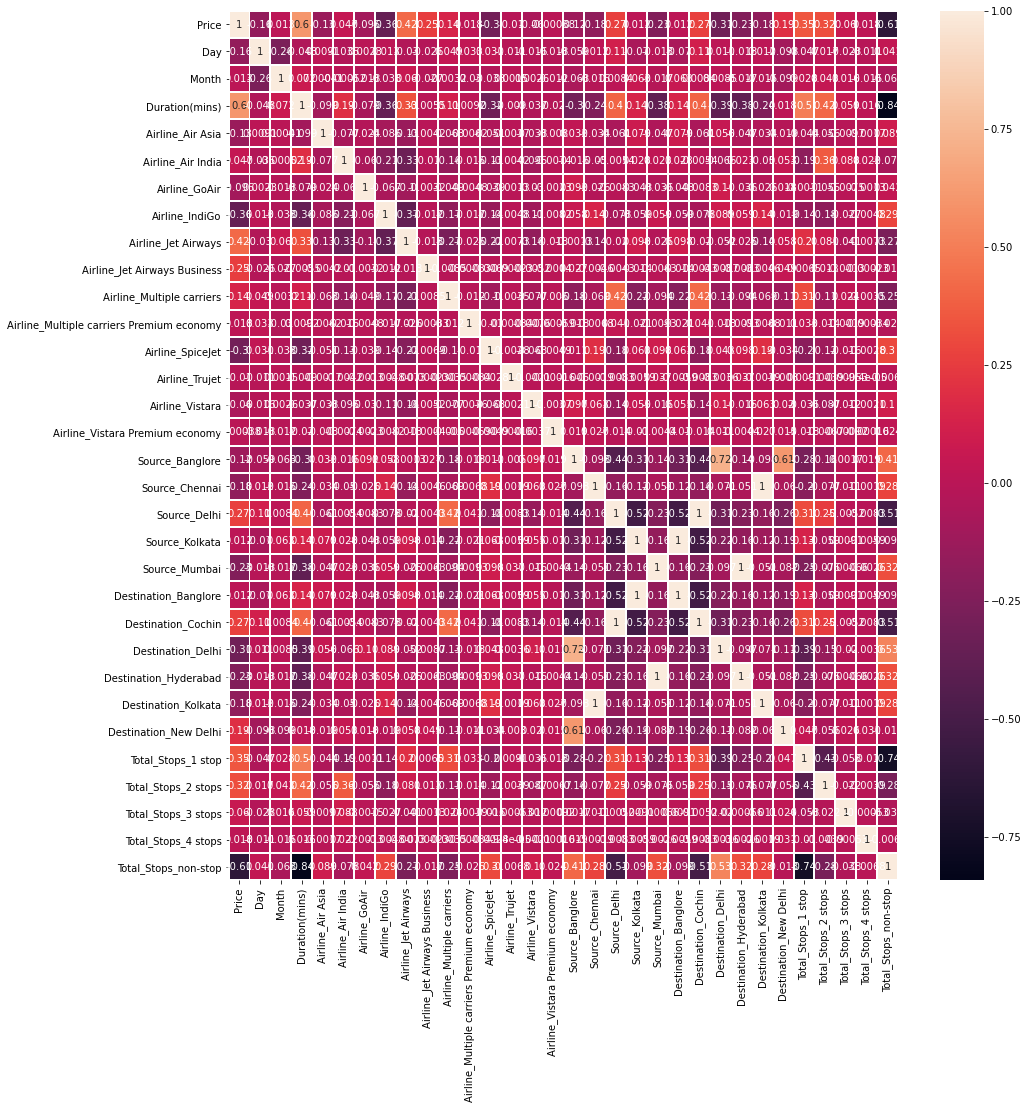

In [118]:
plt.figure(figsize=(15,16))
sns.heatmap(f_corr,annot = True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column

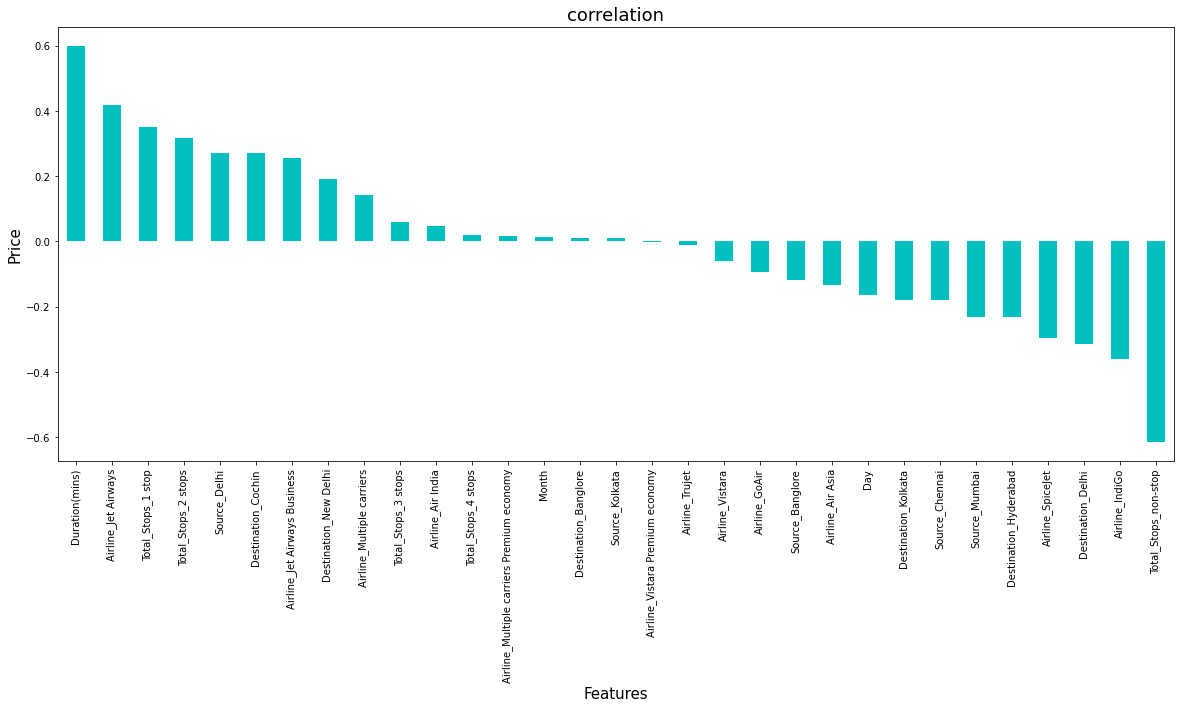

In [119]:
plt.figure(figsize = (20,8))
Flight_DF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It is observed that Duration(mins), Airline Jet_Airways,Total_Stops_1 stop have the highest positive correlation with Price, while Total_Stops_non-stop,Airline_IndiGo,Destination_Delhi and Airline_SpiceJet have the highest negative correlation with Price.

# Feature Selection

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
x = Flight_DF.drop(columns=['Price'])
y = Flight_DF['Price']

In [122]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Checking for multicollinearity using Variance Inflation factor

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
vif = pd.DataFrame()

In [131]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [132]:
vif

,Features,vif
0,Day,1.115612
1,Month,1.104883
2,Duration(mins),4.973584
3,Airline_Air Asia,inf
4,Airline_Air India,inf
5,Airline_GoAir,inf
6,Airline_IndiGo,inf
7,Airline_Jet Airways,inf
8,Airline_Jet Airways Business,inf
9,Airline_Multiple carriers,inf


There is no multicollinearity

# Principle component analysis

In [133]:
from sklearn.decomposition import PCA

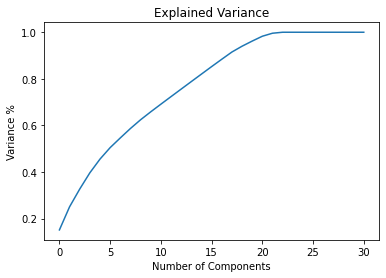

In [134]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

# Slecting K Best feature

In [136]:
from sklearn.feature_selection import SelectKBest, f_classif

In [137]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')

In [138]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [139]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(32,'Score'))

                                      Feature       Score
10  Airline_Multiple carriers Premium economy         inf
29                        Total_Stops_4 stops         inf
14            Airline_Vistara Premium economy         inf
8                Airline_Jet Airways Business         inf
12                             Airline_Trujet         inf
30                       Total_Stops_non-stop  417.291686
7                         Airline_Jet Airways  380.865480
13                            Airline_Vistara  347.421557
21                         Destination_Cochin  246.528180
17                               Source_Delhi  246.528180
15                            Source_Banglore  235.066127
9                   Airline_Multiple carriers  226.977214
19                              Source_Mumbai  224.672568
23                      Destination_Hyderabad  224.672568
18                             Source_Kolkata  220.360379
20                       Destination_Banglore  220.360379
16            

Selecting best features based on their scores:

In [141]:
x_best = x.drop(columns=['Airline_Multiple carriers Premium economy','Total_Stops_4 stops','Airline_Vistara Premium economy','Airline_Jet Airways Business','Airline_Trujet']).copy()

In [142]:
scaled_x_best = scaler.fit_transform(x_best)

This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.

# Regression Model Building

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
from sklearn.metrics import r2_score

# Finding the best Random State

In [146]:
from xgboost import XGBRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  XGBRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8166691196091693 on random_state: 64


In [148]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size=.25,random_state=64)

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [150]:
from sklearn.metrics import r2_score,mean_squared_error

In [151]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

# Training the model

In [152]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

# Ridge Regression Model

In [153]:
y_r_pred = r.predict(x_test)

R2 Score 

In [154]:
r2_score(y_test,y_r_pred)

0.5846894869450244

Mean Squared Error

In [155]:
mean_squared_error(y_test,y_r_pred)

8897085.626179995

Root mean squared error

In [156]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

2982.7982878800226

# Random Forest Regression Model

In [157]:
y_rf_pred = rf.predict(x_test)

R2 Score

In [158]:
r2_score(y_test,y_rf_pred)

0.7808419299388263

Mean Squared error

In [160]:
mean_squared_error(y_test,y_rf_pred)

4694964.499356435

Root mean squared error

In [161]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

2166.7866760150696

# XGB Regression Model

In [162]:
y_xg_pred = xg.predict(x_test)

R2 Score

In [163]:
r2_score(y_test,y_xg_pred)

0.8166691196091693

Mean Squared error

In [164]:
mean_squared_error(y_test,y_xg_pred)

3927448.2332795407

Root mean squared error

In [165]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

1981.7790576347154

# Support Vector Regression Model

In [166]:
y_svr_pred = SV.predict(x_test)

R2 Score

In [167]:
r2_score(y_test,y_svr_pred)

0.07553216792026807

Mean Squared error

In [168]:
mean_squared_error(y_test,y_svr_pred)

19804626.182370666

Root mean squared error

In [169]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

4450.2388904833715

# Decision Tree Regression Model

In [170]:
y_dt_pred = dt.predict(x_test)

R2 Score

In [171]:
r2_score(y_test,y_dt_pred)

0.6837206940406476

Mean Squared error

In [172]:
mean_squared_error(y_test,y_dt_pred)

6775566.662663914

Root mean squared error

In [173]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

2602.991867575447

# Model Cross Validation

In [175]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

# Ridge Regression

In [176]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.578359684092592

# Random Forest Regression

In [177]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.7312379671406269

# XGB Regression

In [179]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.7827606488633125

# SV Regression

In [180]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

0.07940244902086904

# Decision Tree Regression

In [181]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.6043658529944439

Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB Regressor is the best model. It also has the lowest Root Mean Squared Error score

# Hyper Parameter Tuning

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [184]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [185]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [186]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 4,
 'subsample': 1}

In [187]:
Best_mod = XGBRegressor(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 4,subsample = 1)
Best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=10, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [188]:
xgbpred = Best_mod.predict(x_test)
acc = r2_score(y_test,xgbpred)
print(acc*100)

82.53632427228445


XGB Regressor has an accuracy of 82.53%

# Saving The Model

In [189]:
import joblib
joblib.dump(Best_mod,"BestModelFlight.pkl")

['BestModelFlight.pkl']

# Preparing the Test Dataset

In [191]:
Flight_test_DF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [193]:
Flight_test_DF.drop(columns=['Route','Additional_Info'],inplace=True)

In [195]:
Flight_test_DF['Date_of_Journey']=pd.to_datetime(Flight_test_DF['Date_of_Journey'])

In [196]:
#mapping day values to 'Day' column in main dataframe

Flight_test_DF['Day']=Flight_test_DF['Date_of_Journey'].apply(lambda d:d.day) 

In [198]:
#mapping month values to 'Month' column in main dataframe

Flight_test_DF['Month']=Flight_test_DF['Date_of_Journey'].apply(lambda m:m.month) 

In [199]:
Flight_test_DF.drop(columns = ['Date_of_Journey'],inplace = True)

In [201]:
#creating a list with values from colum 'Duration'

duration = Flight_test_DF['Duration'].tolist() 

In [202]:
#replacing 'h' with *60, whitespace with "+" and removing "m"

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace(" ","+").replace("m","") 

In [203]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [204]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [205]:
dur_df.index = Flight_test_DF.index

In [207]:
Flight_test_DF['Duration(mins)'] = dur_df['Duration(mins)']

In [208]:
Flight_test_DF.drop(columns = ['Duration'],inplace=True)

In [209]:
Flight_test_DF.drop(columns = ['Dep_Time','Arrival_Time'],inplace=True)

In [211]:
df2 =Flight_test_DF[['Duration(mins)']].copy()

In [212]:
#taking 3 as threshold value

from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] 

In [214]:
dropindx = Flight_test_DF.index.difference(df3.index)

In [215]:
#resetting the index of the dataframe

Flight_test_DF.reset_index(drop=True,inplace = True) 

In [216]:
from sklearn.preprocessing import PowerTransformer

In [217]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [219]:
df4 = Flight_test_DF[['Duration(mins)']]

In [220]:
transformed= powtrans.fit_transform(df4)

In [221]:
#to convert numpy array back into dataframe

transformed = pd.DataFrame(transformed, columns=df4.columns) 

In [223]:
transformed.index = Flight_test_DF.index

In [224]:
Flight_test_DF[['Duration(mins)']] = transformed[['Duration(mins)']]

In [225]:
dumm = pd.get_dummies(Flight_test_DF[['Airline','Source','Destination','Total_Stops']],drop_first = False)

In [227]:
Flight_test_DF = Flight_test_DF.join(dumm)

In [228]:
Flight_test_DF.drop(columns = ['Airline','Source','Destination','Total_Stops'],inplace=True)

In [229]:
x_best = Flight_test_DF.drop(columns=['Airline_Multiple carriers Premium economy','Total_Stops_4 stops','Airline_Vistara Premium economy','Airline_Jet Airways Business']).copy()

In [230]:
scaled_x_best = scaler.fit_transform(x_best)

# Loading the modedl

In [231]:
mod=joblib.load("BestModelFlight.pkl")

In [232]:
print(mod.predict(scaled_x_best))

[11567.12    4593.6274 12980.077  ... 15072.323  12636.3    10171.34  ]


In [233]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y[0:2671]})
Prediction_accuracy.head(20)

,Predictions,Actual Values
0,11567.120117,3897
1,4593.627441,7662
2,12980.077148,13882
3,10131.211914,6218
4,3862.854736,13302
5,11167.079102,3873
6,10594.271484,11087
7,8871.871094,22270
8,4644.730469,11087
9,12064.024414,8625
